# Practice: Linear regression from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

# Generate data

Generate multivariate normal distribution:

In [4]:
np.random.seed(0)

mean = [-2, 5] 

cov = [[1, -0.75], 
       [-0.75, 1]] 

sample = np.random.multivariate_normal(mean, cov, size=1000) # start dataset, where we will add outlayers

Тестувати викиди будемо за допомогою 4 датасетів з різними викидами

Перший - чистий датасет з розподілом.

Другий - з одним викидом, але який знаходиться далеко від більшості точок

Третій - з 10 викидами, порядок яких майже не відрізняється від точок розподілу

Четвертий - з 100 викидами, які лежать кучно

In [88]:
#datasets with outlayers
dirty_sample_1 = np.append(sample, [[20,20]], axis = 0)

dirty_sample_2 = np.append(sample, [[4,8]], axis = 0)
for i in range(10):
    dirty_sample_2 = np.append(dirty_sample_2, np.random.random((1,2))/2+3.75 + [0,4], axis = 0)

dirty_sample_3 = np.append(sample, [[4,8]], axis = 0)
for i in range(100):
    dirty_sample_3 = np.append(dirty_sample_3, np.random.random((1,2))/2+3.75 + [0,4], axis = 0)

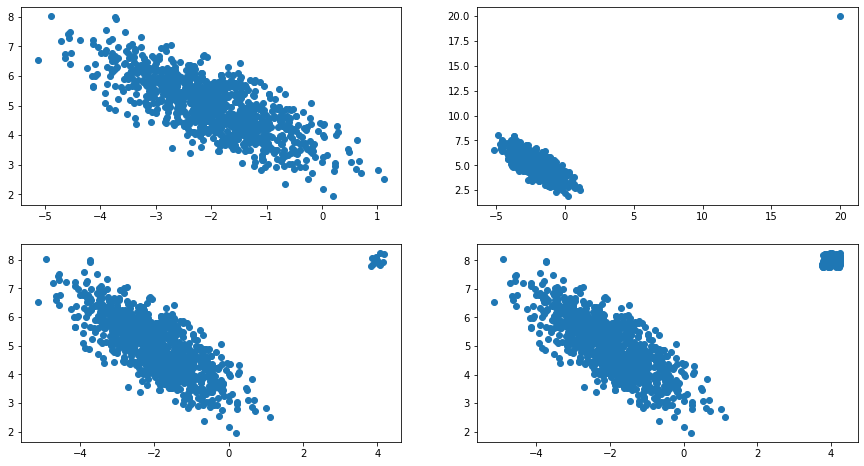

In [89]:
x, y = sample[:, 0], sample[:, 1]
x_d1, y_d1 = dirty_sample_1[:, 0], dirty_sample_1[:,1]
x_d2, y_d2 = dirty_sample_2[:, 0], dirty_sample_2[:,1]
x_d3, y_d3 = dirty_sample_3[:, 0], dirty_sample_3[:,1]

fig, axs = plt.subplots(2,2)

axs[0,0].scatter(x, y) # normal distribution
axs[0,1].scatter(x_d1, y_d1) #one outlayer far away from model prediction
axs[1,0].scatter(x_d2, y_d2) #ten outlayers near model prediction
axs[1,1].scatter(x_d3, y_d3) #one hundred outlayers near model prediction

plt.show()

Create and visualize dataset

In [90]:
# Add singular bias feature
X = np.array([np.array([1, val]) for val in x])
X_d1 = np.array([np.array([1, val]) for val in x_d1])
X_d2 = np.array([np.array([1, val]) for val in x_d2])
X_d3 = np.array([np.array([1, val]) for val in x_d3])

In [91]:
X_d3.shape, y_d3.shape

((1101, 2), (1101,))

Some maths fuctions:

In [92]:
def predict(X, theta):
    return np.dot(X, theta)
def computeCost(X, y, theta):
    return sum((y - predict(X, theta))**2) / (2 * len(X))


Test for random weights:

In [93]:
theta = np.empty_like(X[0])
theta_d1 = np.empty_like(X_d1[0])
theta_d2 = np.empty_like(X_d2[0])
theta_d3 = np.empty_like(X_d3[0])

In [94]:
print(predict(X, theta).shape)

(1000,)


Visualize model's prediction:

# Learn model

In [119]:
def gradientDescent(X, y, init = 1, alpha = 0.001, iters = 100):
#     theta = np.array([1,1]) * init # init theta with any scalar or vector
    theta = np.ones_like(X[0]) * init # init theta with any scalar or vector
    m = len(X) 
    history = [theta] # list of theta values on each iteration 
    cost = [computeCost(X, y, theta)] # list of cost function values on each iteration
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        theta = theta + alpha  * (np.sum((y - np.dot(X, theta.T)) * X.T, axis = 1)) # gradient descent itself, vectorized
    
    return theta, np.array(cost), np.array(history)

alpha = 0.0001
iters = 100

Навчаємо модель для кожного випадка викидів

In [174]:
w, cost, history = gradientDescent(X, y, 
                                   alpha = alpha, 
                                   iters = iters, 
                                   init = [5,10])

w1, cost1, history1 = gradientDescent(X_d1, y_d1, 
                                   alpha = alpha, 
                                   iters = iters, 
                                   init = [5,10])

w2, cost2, history2 = gradientDescent(X_d2, y_d2, 
                                   alpha = alpha, 
                                   iters = iters, 
                                   init = [5,10])

w3, cost3, history3 = gradientDescent(X_d3, y_d3, 
                                   alpha = alpha, 
                                   iters = iters, 
                                   init = [5,10])

In [175]:
C = [computeCost(X, y, w), computeCost(X_d1, y_d1, w1), computeCost(X_d2, y_d2, w2), computeCost(X_d3, y_d3, w3)]
W = [w,w1,w2,w3]

Проілюструємо це на графіках

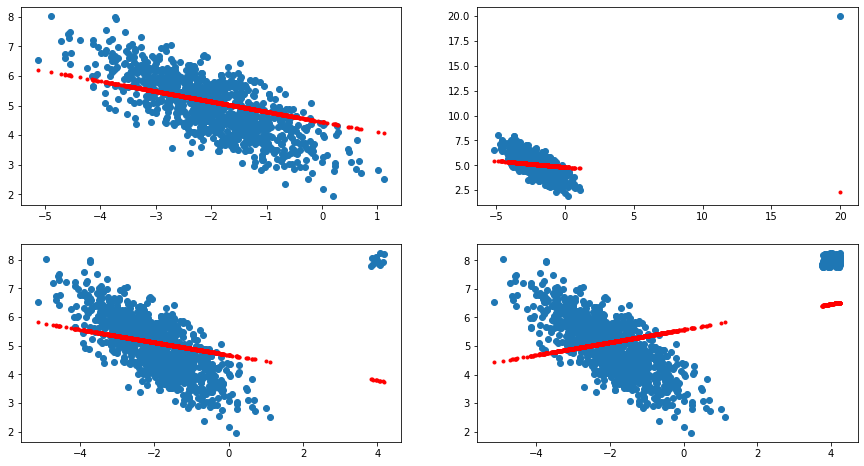

In [176]:
fig, axs = plt.subplots(2,2)

axs[0,0].scatter(x, y) # normal distribution
axs[0,0].plot(x, predict(X,w), 'r.') 

axs[0,1].scatter(x_d1, y_d1) #one outlayer near to model prediction
axs[0,1].plot(x_d1, predict(X_d1,w1), 'r.') 

axs[1,0].scatter(x_d2, y_d2) #one outlayer far from model prediction
axs[1,0].plot(x_d2, predict(X_d2,w2), 'r.') 

axs[1,1].scatter(x_d3, y_d3) #fifty outlayers near to model prediction
axs[1,1].plot(x_d3, predict(X_d3,w3), 'r.') 

plt.show()

#### Add stochastic mode for gradient descent:

In [177]:
def StochasticGD(X, y, alpha, iters, batch_size, init = 1):
    theta = np.ones_like(X[0]) * init
    # unnecessary variables for visualization purposes
    cost = []
    history = []
    data = [] # put batches here
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        idx = np.random.choice(len(X), replace=False, size=batch_size) # choose random batch from dataset
        data.append((X[idx][:,1], y[idx]))
        theta, _, _ = gradientDescent(X[idx], y[idx], 
                                      alpha = alpha, 
                                      iters = 1, 
                                      init = theta)
    return theta, np.array(cost), np.array(history), np.array(data)

In [178]:
w, cost, history, data = StochasticGD(X, y, 
                                alpha = 0.01, 
                                iters = iters*10, 
                                batch_size = 2, 
                                init = [5,10])

w1, cost1, history1, data1 = StochasticGD(X_d1, y_d1, 
                                alpha = 0.01, 
                                iters = iters*10, 
                                batch_size = 2, 
                                init = [5,10])

w2, cost2, history2, data2 = StochasticGD(X_d2, y_d2, 
                                alpha = 0.01, 
                                iters = iters*10, 
                                batch_size = 2, 
                                init = [5,10])

w3, cost3, history3, data3 = StochasticGD(X_d3, y_d3, 
                                alpha = 0.01, 
                                iters = iters*10, 
                                batch_size = 2, 
                                init = [5,10])

In [179]:
C1 = [computeCost(X, y, w), computeCost(X_d1, y_d1, w1), computeCost(X_d2, y_d2, w2), computeCost(X_d3, y_d3, w3)]
W1 = [w,w1,w2,w3]

##### Let's try sklearn implementation:

In [180]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

model1 = linear_model.LinearRegression()
model1.fit(X_d1, y_d1)

model2 = linear_model.LinearRegression()
model2.fit(X_d2, y_d2)

model3 = linear_model.LinearRegression()
model3.fit(X_d3, y_d3)

LinearRegression()

Get a look to the model's coefficients:

In [181]:
w = np.array([model.intercept_, model.coef_[1]]) # to visualize it in usual way
w1 = np.array([model1.intercept_, model1.coef_[1]])
w2 = np.array([model2.intercept_, model2.coef_[1]])
w3 = np.array([model3.intercept_, model3.coef_[1]])

W2 = [w,w1,w2,w3]
C2 = [computeCost(X, y, w), computeCost(X_d1, y_d1, w1), computeCost(X_d2, y_d2, w2), computeCost(X_d3, y_d3, w3)]

А зараз спробуємо порівняти, як різні види викидів впливають на підсумкову модель залежно від вибору методу


In [183]:
print("Clean dataset: \n")
print("\t GD : Cost: %.4f" % C[0], ", calculated weights", W[0])
print("\t SGD: Cost: %.4f" % C1[0], ", calculated weights", W1[0])
print("\t SKL: Cost: %.4f" % C2[0], ", calculated weights", W2[0])

print("\nOne large outlayer: \n")
print("\t GD : Cost: %.4f" % C[1], ", calculated weights", W[1])
print("\t SGD: Cost: %.4f" % C1[1], ", calculated weights", W1[1])
print("\t SKL: Cost: %.4f" % C2[1], ", calculated weights", W2[1])

print("\nTen outlayers: \n")
print("\t GD : Cost: %.4f" % C[2], ", calculated weights", W[2])
print("\t SGD: Cost: %.4f" % C1[2], ", calculated weights", W1[2])
print("\t SKL: Cost: %.4f" % C2[2], ", calculated weights", W2[2])

print("\nOne hundred outlayers: \n")
print("\t GD : Cost: %.4f" % C[3], ", calculated weights", W[3])
print("\t SGD: Cost: %.4f" % C1[3], ", calculated weights", W1[3])
print("\t SKL: Cost: %.4f" % C2[3], ", calculated weights", W2[3])

Clean dataset: 

	 GD : Cost: 0.2956 , calculated weights [ 4.44903022 -0.34529236]
	 SGD: Cost: 0.2103 , calculated weights [ 3.645976   -0.68171227]
	 SKL: Cost: 0.2085 , calculated weights [ 3.50893732 -0.73984059]

One large outlayer: 

	 GD : Cost: 0.5502 , calculated weights [ 4.82495142 -0.12736901]
	 SGD: Cost: 0.5801 , calculated weights [ 4.87778159 -0.21030844]
	 SKL: Cost: 0.5333 , calculated weights [ 4.47419246 -0.26360414]

Ten outlayers: 

	 GD : Cost: 0.4389 , calculated weights [ 4.67439773 -0.22215996]
	 SGD: Cost: 0.4286 , calculated weights [ 4.23265638 -0.46330042]
	 SKL: Cost: 0.4178 , calculated weights [ 4.27726213 -0.38142549]

One hundred outlayers: 

	 GD : Cost: 0.7118 , calculated weights [5.57354495 0.22308427]
	 SGD: Cost: 0.7263 , calculated weights [5.59578175 0.1589858 ]
	 SKL: Cost: 0.7118 , calculated weights [5.5717702  0.22260527]


In [189]:
#D = [C[1]-C[0],C1[1]-C1[0]]
print("\nDifference between 1 outlayer & clean dataset: \n")
print("\t GD : Cost: %.4f" % (C[1]-C[0]), ", calculated weights", W[1] - W[0])
print("\t SGD: Cost: %.4f" % (C1[1]-C1[0]), ", calculated weights", W1[1]-W1[0])
print("\t SKL: Cost: %.4f" % (C2[1]-C2[0]), ", calculated weights", W2[1]-W2[0])

print("\nDifference between 10 outlayers: \n")
print("\t GD : Cost: %.4f" % (C[2]-C[0]), ", calculated weights", W[2]-W[0])
print("\t SGD: Cost: %.4f" % (C1[2]-C1[0]), ", calculated weights", W1[2]-W1[0])
print("\t SKL: Cost: %.4f" % (C2[2]-C2[0]), ", calculated weights", W2[2]-W2[0])

print("\nDifference between 100 outlayers: \n")
print("\t GD : Cost: %.4f" % (C[3]-C[0]), ", calculated weights", W[3]-W[0])
print("\t SGD: Cost: %.4f" % (C1[3]-C1[0]), ", calculated weights", W1[3]-W1[0])
print("\t SKL: Cost: %.4f" % (C2[3]-C2[0]), ", calculated weights", W2[3]-W2[0])


Difference between 1 outlayer & clean dataset: 

	 GD : Cost: 0.2545 , calculated weights [0.3759212  0.21792335]
	 SGD: Cost: 0.3697 , calculated weights [1.23180559 0.47140383]
	 SKL: Cost: 0.3248 , calculated weights [0.96525514 0.47623646]

Difference between 10 outlayers: 

	 GD : Cost: 0.1433 , calculated weights [0.22536752 0.12313241]
	 SGD: Cost: 0.2182 , calculated weights [0.58668038 0.21841185]
	 SKL: Cost: 0.2093 , calculated weights [0.76832481 0.3584151 ]

Difference between 100 outlayers: 

	 GD : Cost: 0.4162 , calculated weights [1.12451473 0.56837663]
	 SGD: Cost: 0.5159 , calculated weights [1.94980575 0.84069807]
	 SKL: Cost: 0.5033 , calculated weights [2.06283288 0.96244586]


При додаванні викидів значення cost function у результата очікувано збільшується. 
Легко побачити, що звичайний градієнтний спуск найменш чутливий до будь-яких викидів даних, тобто незважаючи на викиди модель, яку він пропонує, змінюється найменше.

Ще можна побачити, що один великий викид впливає на точність GD значно більше, ніж 10 викидів з незвачним відхиленням від очікуваних.

А на стохастичний градієнтний спуск та на вбудований у sklearn алгоритм майже однаково відреагували на викиди, SKL трохи чутливіший до додавання декількох схожих даних, що не відпадають під основну модель

Оскільки викиди можна легко прибирати вбудованими алгоритмами, то чутливість SGD $ SKL до викидів не завадить у їх використанні, а менше значення помилки на чистому датасеті ще раз доводить, що потрібно віддавати перевагу готовим оптимізованим методам навчання